YOLO11n summary: 319 layers, 2,591,205 parameters, 0 gradients, 6.4 GFLOPs

image 1/1 /Users/henry/fpga-vision/yolo/sim_ss.png: 416x640 1 traffic sign, 1 car, 48.9ms
Speed: 2.0ms preprocess, 48.9ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


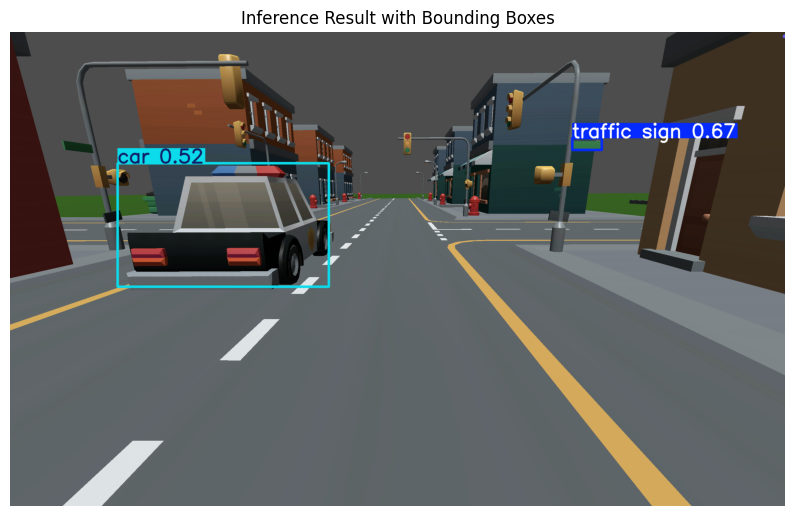

In [8]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

# Load a COCO-pretrained YOLOv8n model
model = YOLO("/Users/henry/fpga-vision/yolo/runs/exp_100k/yolo11n_100k3/weights/last.pt")

# Display model information (optional)
model.info()

# Train the model on the COCO8 example dataset for 100 epochs
# results = model.train(data="coco8.yaml", epochs=100, imgsz=640)

# Run inference with the YOLOv8n model
results = model("sim_ss.png", conf=0.3, iou=0.4)

# visualizing the results
for result in results:
    annotated_img = result.plot()

    # Convert the image from BGR to RGB for correct color display in matplotlib
    annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    # Display the image inline
    plt.figure(figsize=(10, 8))
    plt.imshow(annotated_img_rgb)
    plt.title("Inference Result with Bounding Boxes")
    plt.axis('off')
    plt.show()



In [4]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# ------------------------------------------------------------------------------
# Step 1: Load a COCO-pretrained YOLOv8 model (e.g., YOLOv8n for a nano model)
# ------------------------------------------------------------------------------
model = YOLO("yolo11n.pt")
model.info()

# ------------------------------------------------------------------------------
# Step 2: Fine-tune (Transfer Learning) on your custom dataset
#
# The data parameter points to the YAML file ('100k.yaml') that defines:
#  - The paths to the train, val, and test image directories.
#  - The list of class names.
#
# Adjust the number of epochs, image size, and other hyperparameters as needed.
# ------------------------------------------------------------------------------
results = model.train(
    data="100k.yaml",       # Your custom dataset YAML file
    epochs=100,             # Number of training epochs
    imgsz=640,              # Input image size
    lr0=0.01,               # Initial learning rate (fine-tune as needed)
    project="runs/exp_100k",# Directory to save training results
    name="yolo11n_100k"     # Name of this training run
)

# (Optional) Save the fine-tuned model weights for later use
model.save("yolo11n_100k_finetuned.pt")

# ------------------------------------------------------------------------------
# Step 3: Run Inference on a Sample Image (e.g., a test image from your dataset)
# ------------------------------------------------------------------------------
results = model("sim_ss.png", conf=0.4, iou=0.4)

# ------------------------------------------------------------------------------
# Step 4: Visualize the Inference Results
# ------------------------------------------------------------------------------
for result in results:
    # Get the annotated image with bounding boxes
    annotated_img = result.plot()

    # Convert from BGR (OpenCV default) to RGB for correct display with matplotlib
    annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 8))
    plt.imshow(annotated_img_rgb)
    plt.title("Inference Result with Bounding Boxes")
    plt.axis('off')
    plt.show()

YOLO11n summary: 319 layers, 2,624,080 parameters, 0 gradients, 6.6 GFLOPs
New https://pypi.org/project/ultralytics/8.3.75 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.70 🚀 Python-3.13.2 torch-2.6.0 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=100k.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/exp_100k, name=yolo11n_100k3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, 

Fontconfig warning: ignoring UTF-8: not a valid region tag


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /Users/henry/fpga-vision/yolo/100k/test... 20000 images, 12 backgrounds, 0 corrupt: 100%|██████████| 20000/20000 [00:04<00:00, 4935.38it/s]

train: WARNING ⚠️ /Users/henry/fpga-vision/yolo/100k/test/e6f10c58-c46de527.jpg: 1 duplicate labels removed


train: New cache created: /Users/henry/fpga-vision/yolo/100k/test.cache


val: Scanning /Users/henry/fpga-vision/yolo/100k/train... 70000 images, 32 backgrounds, 0 corrupt: 100%|██████████| 70000/70000 [00:14<00:00, 4898.96it/s]

val: WARNING ⚠️ /Users/henry/fpga-vision/yolo/100k/train/75055858-7d04a650.jpg: 1 duplicate labels removed


val: New cache created: /Users/henry/fpga-vision/yolo/100k/train.cache
Plotting labels to runs/exp_100k/yolo11n_100k3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/exp_100k/yolo11n_100k3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.523      1.568      1.088        488        640: 100%|██████████| 1250/1250 [3:51:00<00:00, 11.09s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2188/2188 [2:45:13<00:00,  4.53s/it]  


                   all      70000    1045516      0.553      0.382      0.404      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.487      1.153      1.054        399        640:  62%|██████▏   | 772/1250 [1:58:27<1:13:20,  9.21s/it]


KeyboardInterrupt: 